In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

sns.set_style('whitegrid')

In [17]:
train = pd.read_csv(r'../input/train.csv')
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [18]:
test = pd.read_csv(r'../input/test.csv')
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


## Data Description

In [19]:
# gives some infos on columns types and numer of null values
train_info=pd.DataFrame(train.dtypes).T.rename(index={0:'column type'})
train_info=train_info.append(pd.DataFrame(train.isnull().sum()).T.rename(index={0:'null values (nb)'}))
train_info=train_info.append(pd.DataFrame(train.isnull().sum()/train.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(train_info)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
column type,object,object,int64,object,object,object,int64,object,int64,object,int64
null values (nb),0,0,0,0,0,0,0,29325,0,0,0
null values (%),0,0,0,0,0,0,0,11.9341,0,0,0


In [20]:
# gives some infos on columns types and numer of null values
test_info=pd.DataFrame(test.dtypes).T.rename(index={0:'column type'})
test_info=test_info.append(pd.DataFrame(test.isnull().sum()).T.rename(index={0:'null values (nb)'}))
test_info=test_info.append(pd.DataFrame(test.isnull().sum()/test.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(test_info)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
column type,object,object,int64,object,object,object,int64,object,int64,object
null values (nb),0,0,0,0,0,0,0,12522,0,0
null values (%),0,0,0,0,0,0,0,11.8904,0,0


**Credit Product has around 12% Null values in both test & train data sets**

In [21]:
train.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,5XVXC7Q7,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [23]:
test.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
count,105312,105312,105312.000000,105312,105312,105312,105312.000000,92790,1.053120e+05,105312
unique,105312,2,NaN,35,4,4,NaN,2,NaN,2
top,9WVKLADB,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No
freq,1,57705,NaN,15125,43192,44484,NaN,61608,NaN,63797
mean,NaN,NaN,43.871002,NaN,NaN,NaN,46.842819,NaN,1.134195e+06,NaN
std,NaN,NaN,14.872890,NaN,NaN,NaN,32.273634,NaN,8.662430e+05,NaN
min,NaN,NaN,24.000000,NaN,NaN,NaN,7.000000,NaN,2.259700e+04,NaN
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.039822e+05,NaN
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.966345e+05,NaN
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.371598e+06,NaN


## EDA

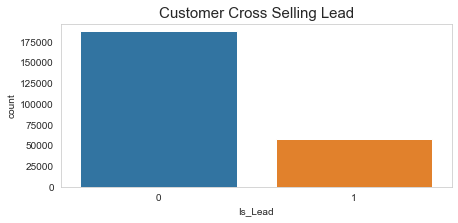

In [38]:
plt.figure(figsize=(7,3))
sns.countplot(train['Is_Lead'])
plt.title('Customer Cross Selling Lead',fontsize=15)
plt.grid(False)
plt.show();

**This is a imbalanced dataset**

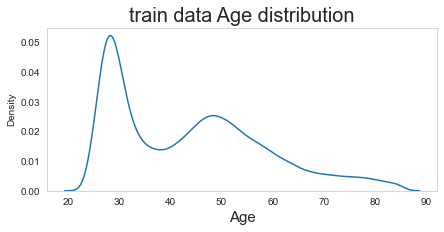

In [37]:
plt.figure(figsize = (7,3))
sns.kdeplot(train['Age']);
plt.xlabel('Age', fontsize = 15)
plt.title('train data Age distribution', fontsize = 20)
plt.grid(False)
plt.show()

**Both Dataset has same distribution**
**Age variable is skewed in both dataset**

#### Average Account Balance Distribution

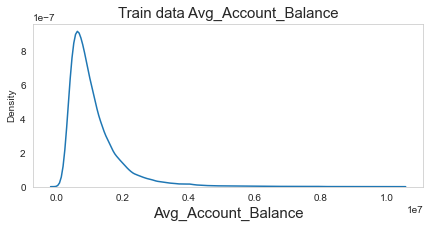

In [46]:
plt.figure(figsize = (7,3))
sns.kdeplot(train['Avg_Account_Balance']);
plt.xlabel('Avg_Account_Balance', fontsize = 15)
plt.title('Train data Avg_Account_Balance', fontsize = 15)
plt.grid(False)
plt.show()

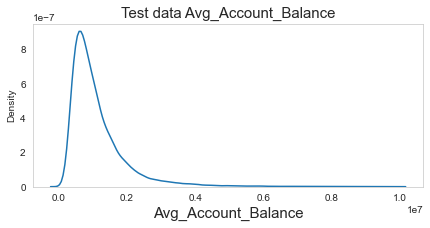

In [47]:
plt.figure(figsize = (7,3))
sns.kdeplot(test['Avg_Account_Balance']);
plt.xlabel('Avg_Account_Balance', fontsize = 15)
plt.title('Test data Avg_Account_Balance', fontsize = 15)
plt.grid(False)
plt.show()

**Both Dataset has same distribution**
**Account variable is skewed in both dataset**

### Annual Avg balance distribtuion occupation wise

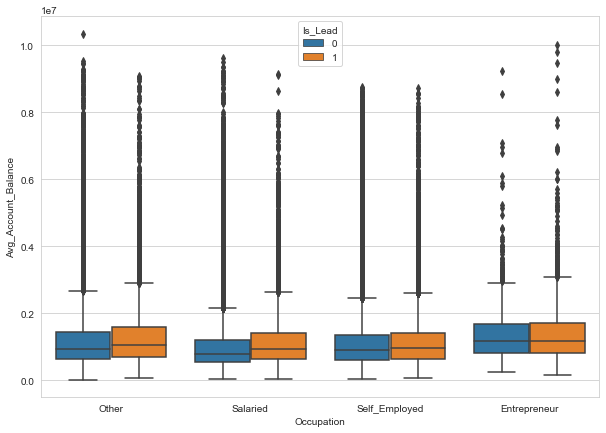

In [50]:
plt.figure(figsize = (10,7))
sns.boxplot(x ='Occupation', y ='Avg_Account_Balance', data = train, hue ='Is_Lead');

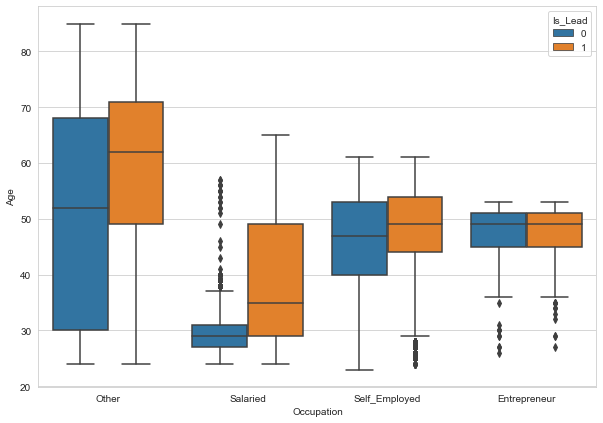

In [52]:
plt.figure(figsize = (10,7))
sns.boxplot(x ='Occupation', y ='Age', data = train, hue ='Is_Lead');

*Avearge account balance has weak correlation with target because for both lead has same distribution*

*Salaried people and is lead on higher Age side*

*where age Entrepreneur independent to lead*

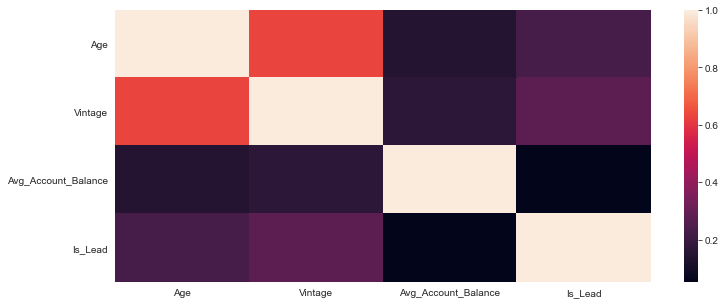

In [55]:
plt.figure(figsize=(12,5))

# plot the heatmap
sns.heatmap(train.corr(), 
        xticklabels=train.corr().columns,
        yticklabels=train.corr().columns);

**Avg Account balance is week correlation**
**Vintage Age has good correlation**